<a href="https://colab.research.google.com/github/sethnanati/ExtraaLearn-Project---Potential_Customers_Prediction/blob/main/Learner_Notebook_Full_Code_Version_Potential_Customers_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (f1_score, accuracy_score, recall_score,
precision_score, confusion_matrix, classification_report, roc_auc_score,
precision_recall_curve, roc_curve, make_scorer)

In [ ]:
#accessing google colab drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

### **Loading the Dataset**

In [ ]:
# Loading the dataset
lead = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Classification_and_Hypothesis_Testing/ExtraaLearn.csv") ##  Complete the code to read the data

In [ ]:
lead.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


### **Checking the info of the dataset**

In [ ]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

- There are **4612 observations** in the dataset.
- There are 1 float64, 4 int64, 10 objects

In [ ]:
lead.shape

(4612, 15)

**Observations:**

- There are **4612 observations and 15 columns** in the dataset.


In [ ]:
# Checking for duplicate values
lead.duplicated().sum()

0

**Observations:**
- There are zero duplicate data in the dataset

In [ ]:
lead.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

**Observations:**
- There are no non-null values in the dataset, i.e., **there are no missing values in the data.**

In [ ]:
# Checking unique values in each column
lead.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

**Observations:**

- **ID number is an identifier** which is unique for each lead and **we can drop this column** as it would not add any value to our analysis.
- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

**Let's drop the columns mentioned above** and define lists for numerical and categorical columns to explore them separately.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

Define lists for numerical and categorical columns to explore them separately.

In [ ]:
lead = lead.drop(columns = 'ID')

In [ ]:
# Creating numerical columns
num_cols=['age','website_visits','time_spent_on_website','page_views_per_visit','status']

In [ ]:
# Checking summary statistics
lead[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


**Observations:**

- **The mean age is 46 years. 75% of the lead are 57 years, and 50% are 51 years, 25% are 36 years below. The minimum age is 18 years and the highest is 63 years old**.

- **At least 75% of the lead had visited the website 5.0 times with the maximum visit at 30 times and with a mean of 3.566 and a standard deviation of 2.829.

- **The time spent on the website but here at the
  148 - 25%,
  376 - 50%,
  1336.75 - 75%
  max time spent - 2537

- **The viewed page per visit 0 and maximum of 18

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(lead.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(lead[column].value_counts(normalize=True))
    print("-" * 50)

Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: current_occupation, dtype: float64
--------------------------------------------------
Website      0.55117
Mobile App   0.44883
Name: first_interaction, dtype: float64
--------------------------------------------------
High     0.49089
Medium   0.48591
Low      0.02320
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: last_activity, dtype: float64
--------------------------------------------------
No    0.89224
Yes   0.10776
Name: print_media_type1, dtype: float64
--------------------------------------------------
No    0.94948
Yes   0.05052
Name: print_media_type2, dtype: float64
--------------------------------------------------
No    0.88573
Yes   0.11427
Name: digital_media, dtype: float64
--------------------------------------------------
No    0.84714
Yes   0.15286
Name: education

**Observations:**

- The feature current_occupation, student lead are the least, followed by unemployed and majority are the Professional
- The first_interaction, most of the leads us the website and then the mobile app
- The profile_completed has a high 0.49089, medium   0.48591,
low 0.02320
- The last_activity has more of email Activity @ 0.49393,
Phone Activity @ 0.26756 and Website Activity @ 0.23851. The preferred channel is Email due to 49% usage over other channels.
- The print_media_type1, print_media_type2, digital_media, educational_channels and referral had majority of no than yes


### **Univariate analysis of numerical columns**

**Let's explore these variables in some more depth by observing their distributions**

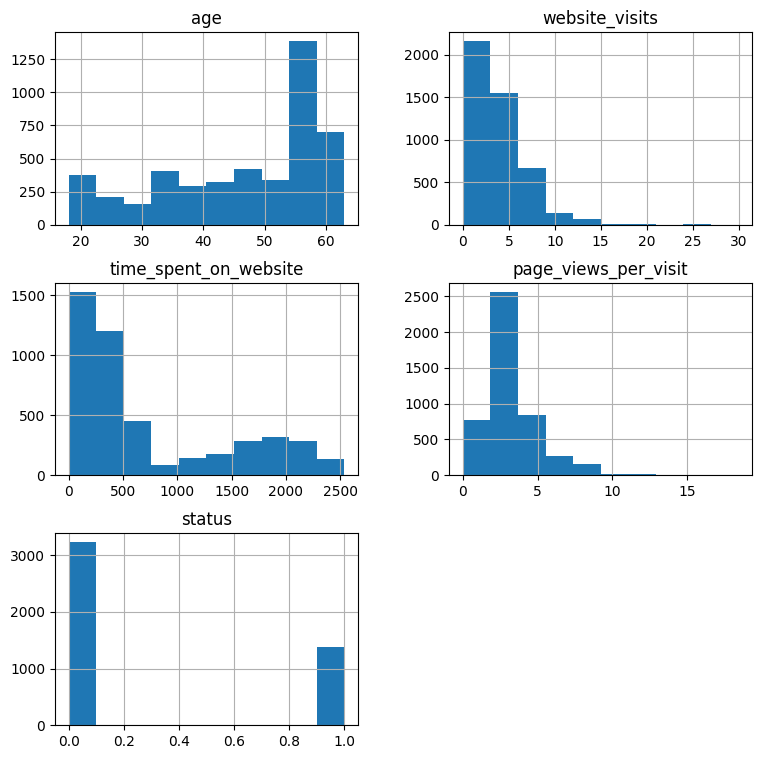

In [ ]:
# Creating histograms
lead[num_cols].hist(figsize=(9,9))
plt.show()

**Observations:**
- This is a historical plot to summarize all the numerical datasets

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

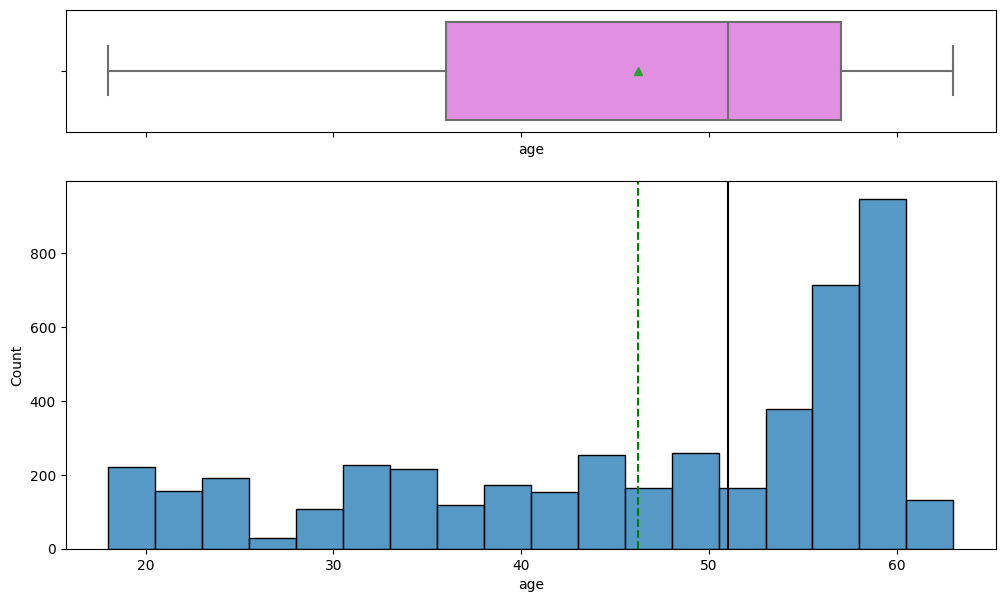

In [ ]:
# Complete the code to plot a histogram_boxplot for age
histogram_boxplot(lead, "age")

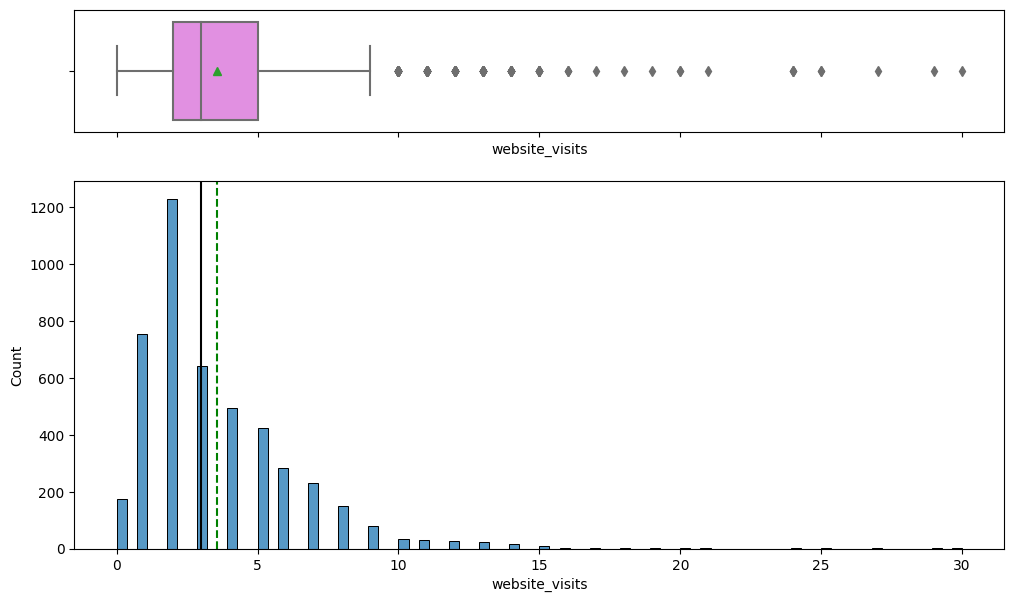

In [ ]:
# Complete the code to plot a histogram_boxplot for website_visits
histogram_boxplot(lead, "website_visits")

In [ ]:
# To check how many leads have not visited web-site
lead[lead["website_visits"] == 0].shape

(174, 14)

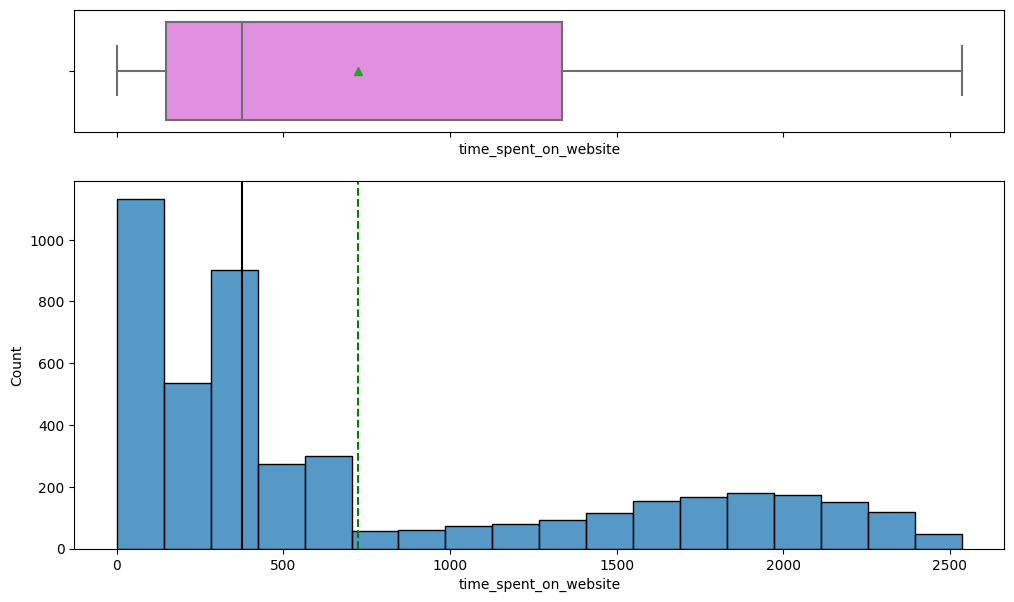

In [ ]:
# Complete the code to plot a histogram_boxplot for time_spent_on_website
histogram_boxplot(lead, "time_spent_on_website")

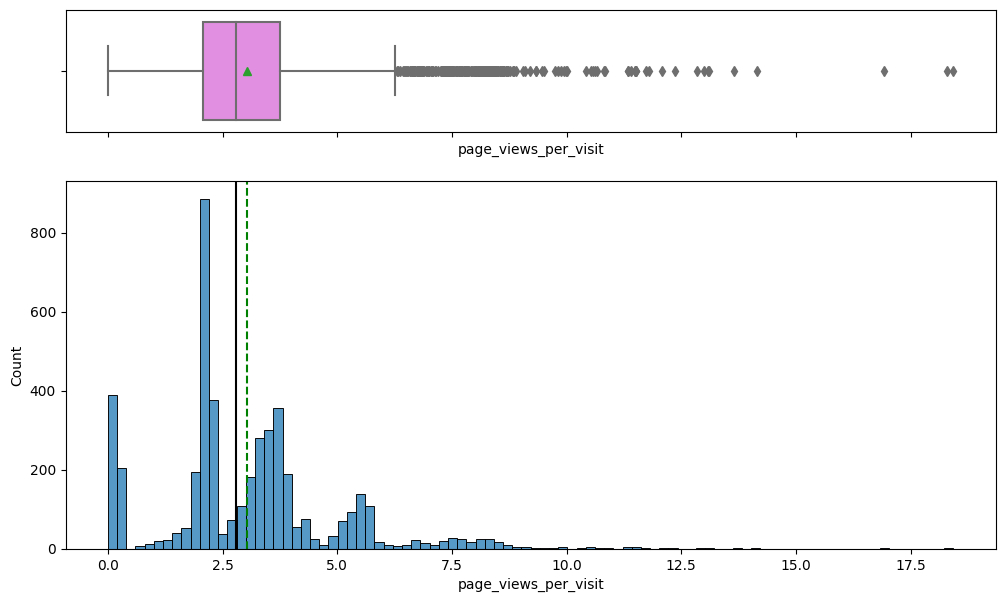

In [ ]:
# Complete the code to plot a histogram_boxplot for page_views_per_visit
histogram_boxplot(lead, "page_views_per_visit")

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

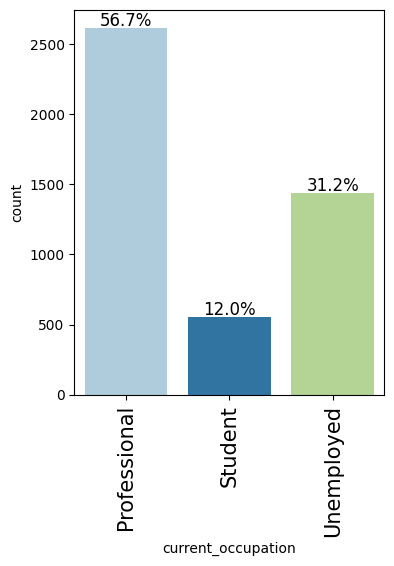

In [ ]:
# Complete the code to plot labeled_barplot for current_occupation
labeled_barplot(lead, "current_occupation", perc=True)

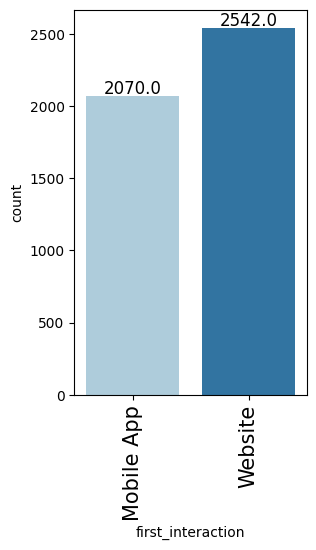

In [ ]:
# Complete the code to plot labeled_barplot for first_interaction
labeled_barplot(lead, "first_interaction")

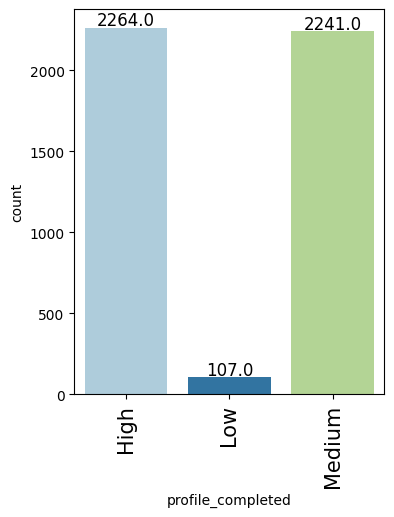

In [ ]:
# Complete the code to plot labeled_barplot for profile_completed
labeled_barplot(lead, "profile_completed")

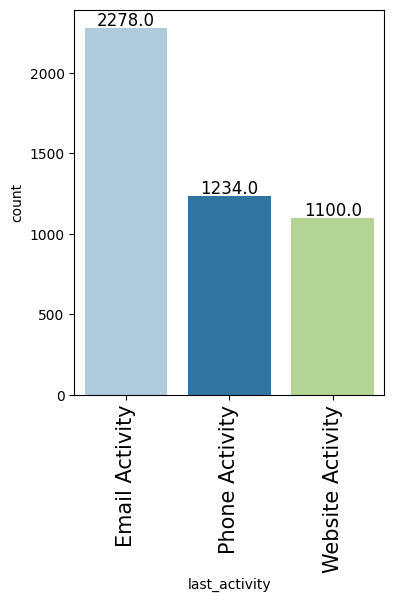

In [ ]:
# Complete the code to plot labeled_barplot for last_activity
labeled_barplot(lead, "last_activity")

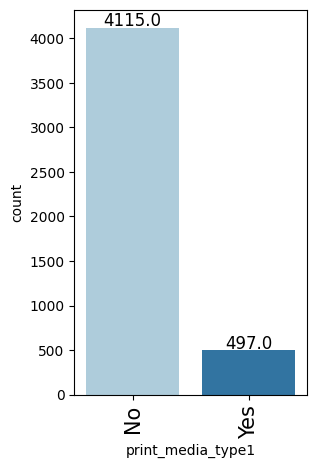

In [ ]:
# Complete the code to plot labeled_barplot for print_media_type1
labeled_barplot(lead, "print_media_type1")

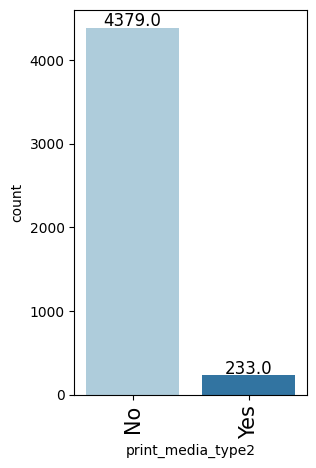

In [ ]:
# Complete the code to plot labeled_barplot for print_media_type2
labeled_barplot(lead, "print_media_type2")

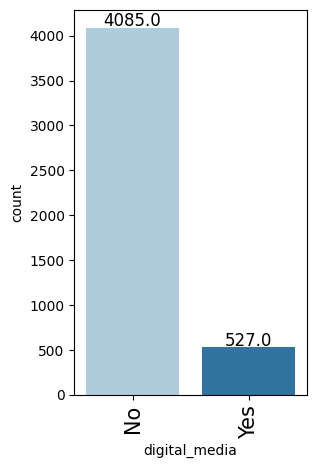

In [ ]:
# Complete the code to plot labeled_barplot for digital_media
labeled_barplot(lead, "digital_media")

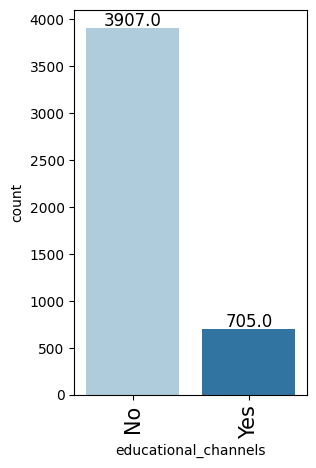

In [ ]:
# Complete the code to plot labeled_barplot for educational_channels
labeled_barplot(lead, "educational_channels")

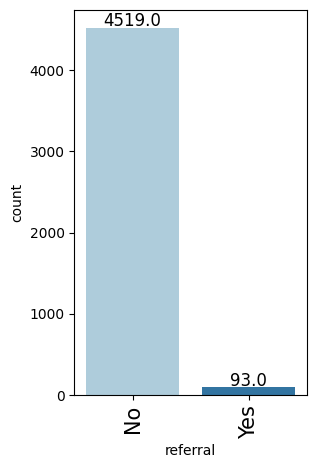

In [ ]:
# Complete the code to plot labeled_barplot for referral
labeled_barplot(lead, "referral")

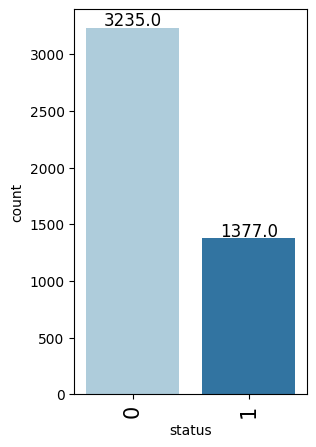

In [ ]:
# Complete the code to plot labeled_barplot for status
labeled_barplot(lead, "status")

**Observations:**
- The status of the converted and not converted leads shows that more leads were not converted. 1377 leads were converted and 3235 were not converted
- Referral also had fewer 93 yes to a higher 4519 no. This same behaviour is replicated in educational_channels 705 yes and 3907 no,
digital_media 4085 no and 527 yes,
print_media_type2 4379 no and 233 yes,
print_media_type1 4115 no, 497 yes
last activity Email 2278, phone 1234 and website 1100
profile completed High 2264, medium 2241 and low 107
first interaction website 2542 and mobile 2070,
current_occupation Professional 56.7%, unemployed 31.2%, Student 12%
- For page_views_per_visit and website_visits we recorderd some outliers from the observed **dataset**

### **Bivariate Analysis**

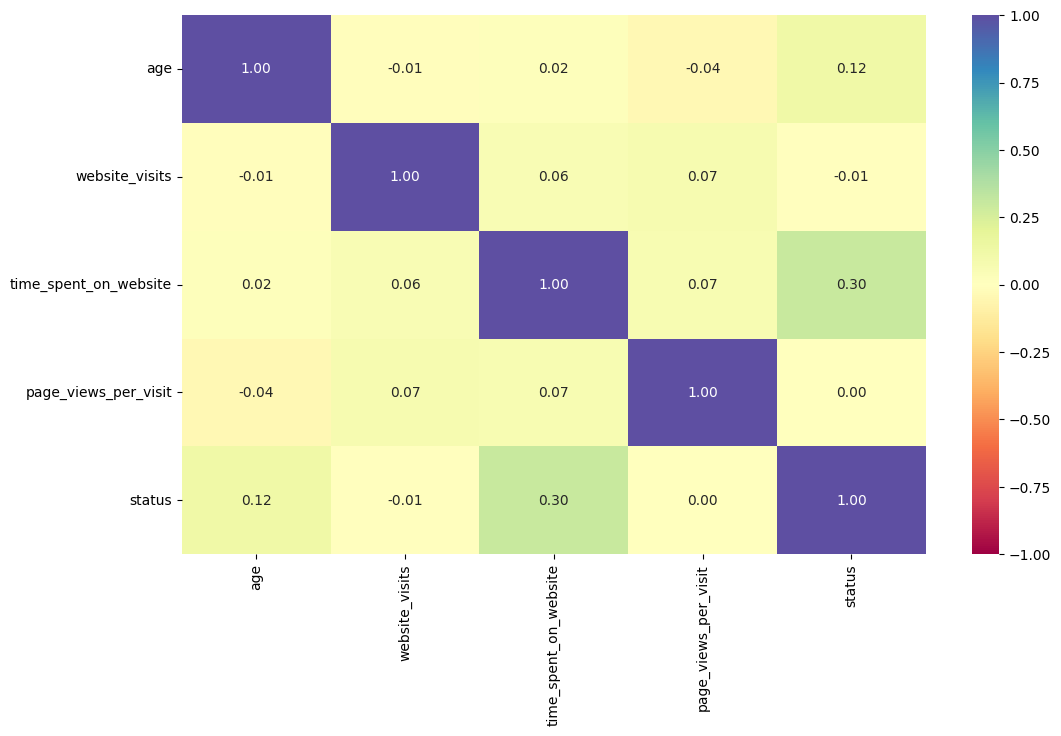

In [ ]:
cols_list = lead.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    lead[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [ ]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
lead.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


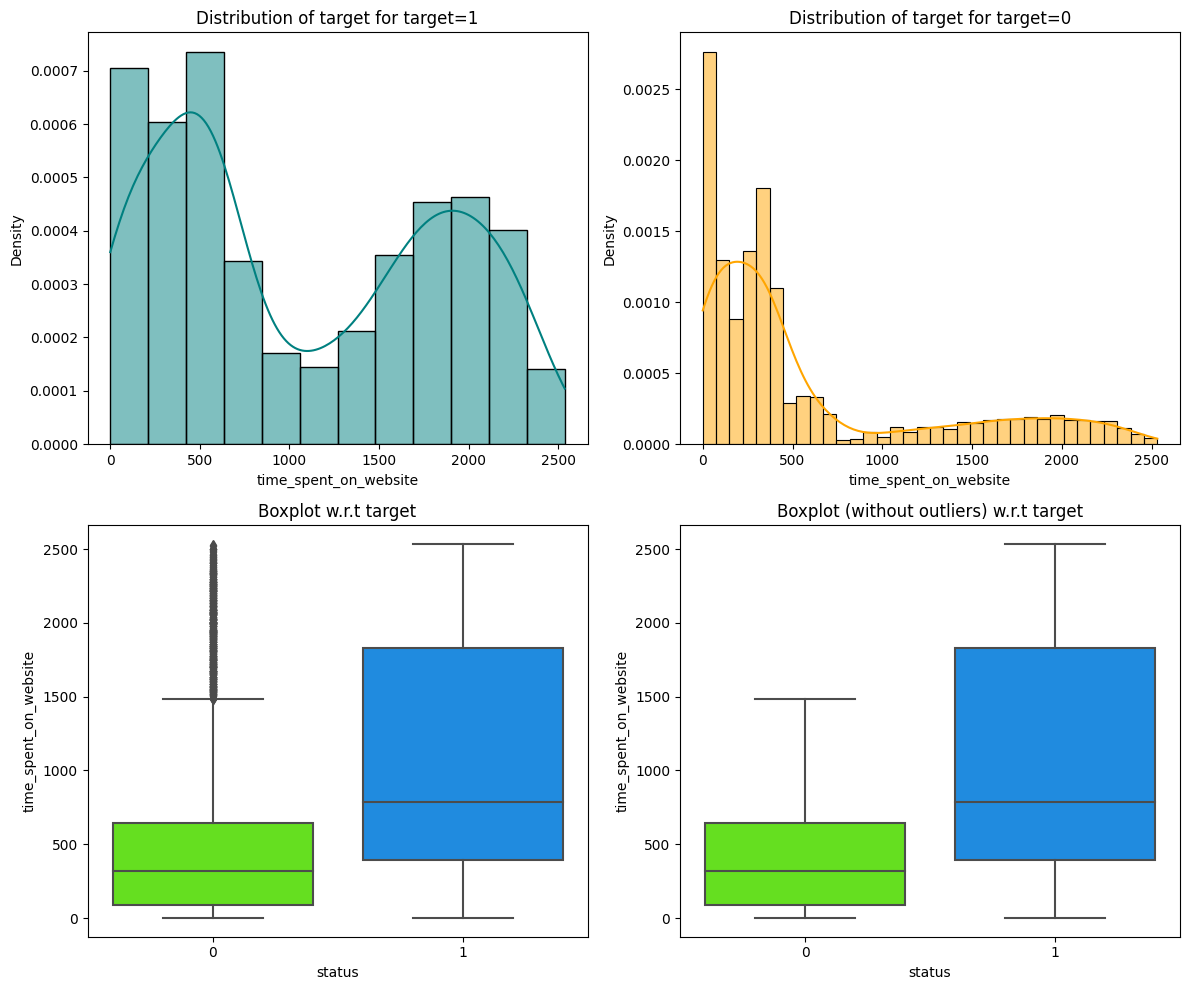

In [ ]:
distribution_plot_wrt_target(lead, "time_spent_on_website", "status")

In [ ]:
lead.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

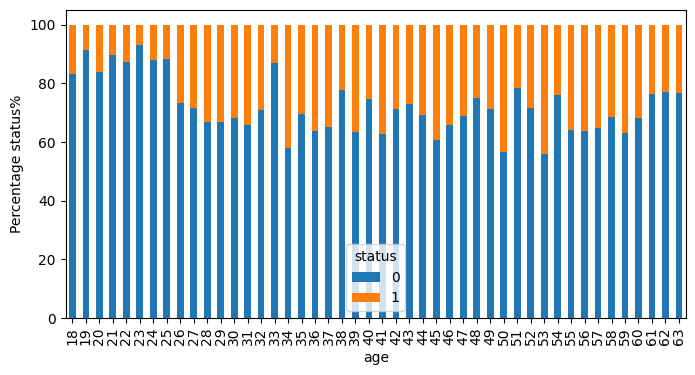

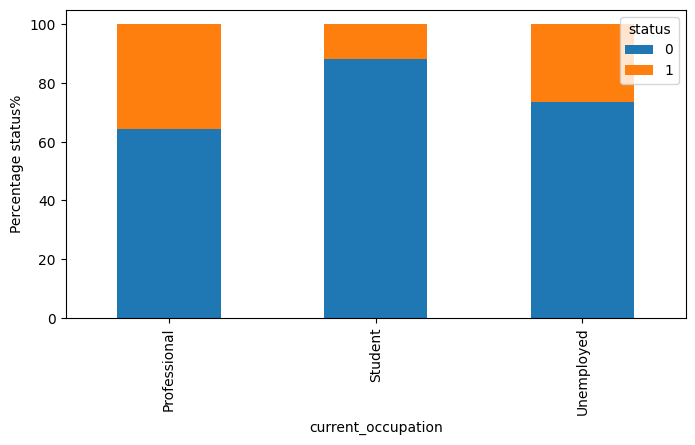

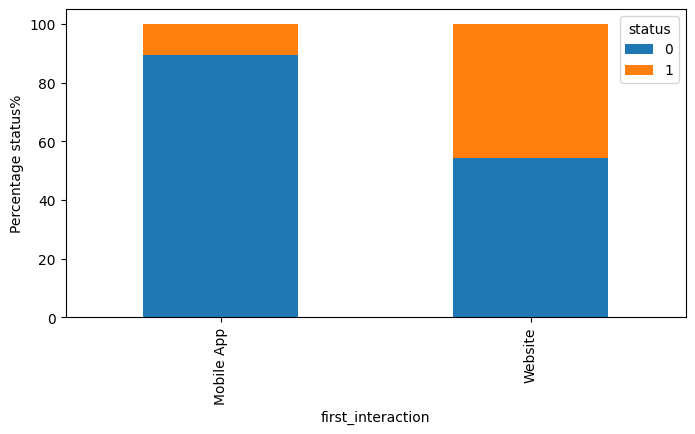

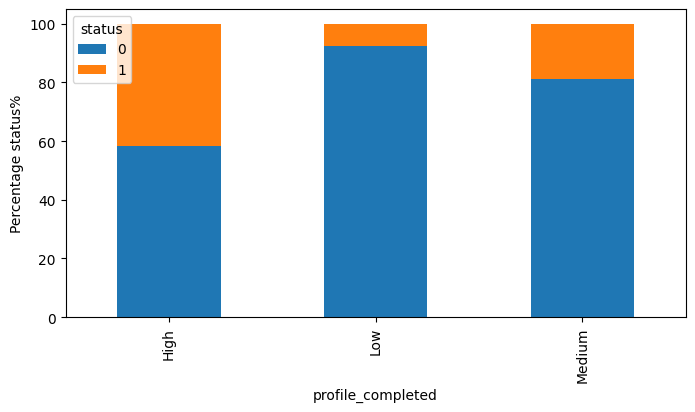

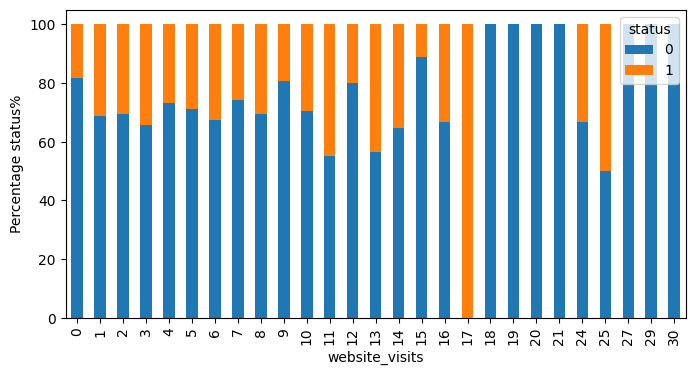

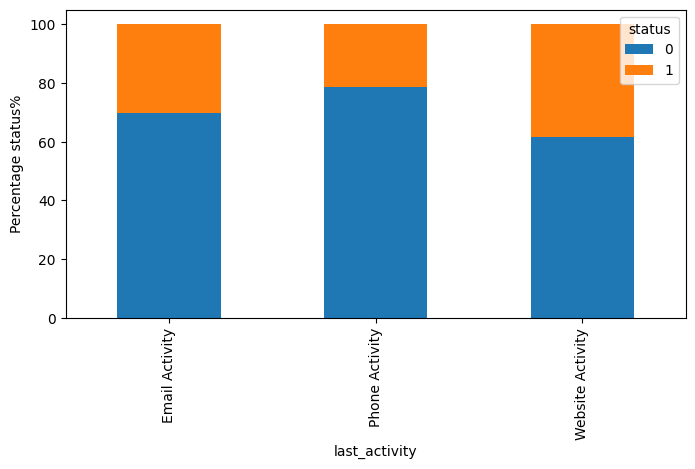

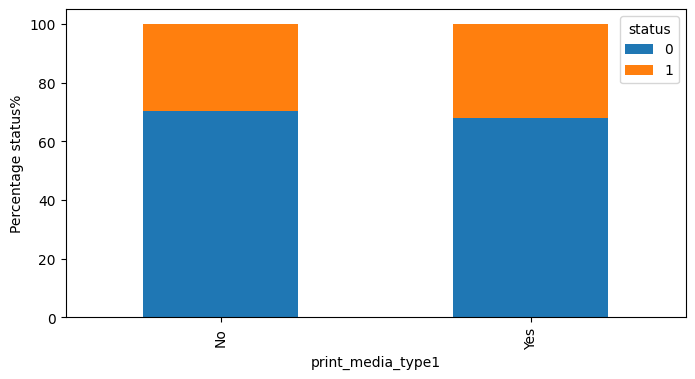

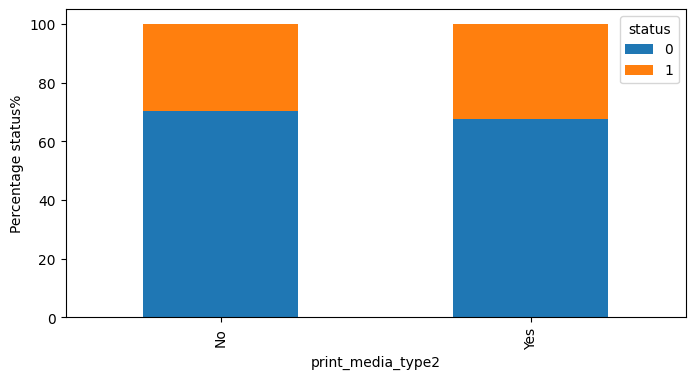

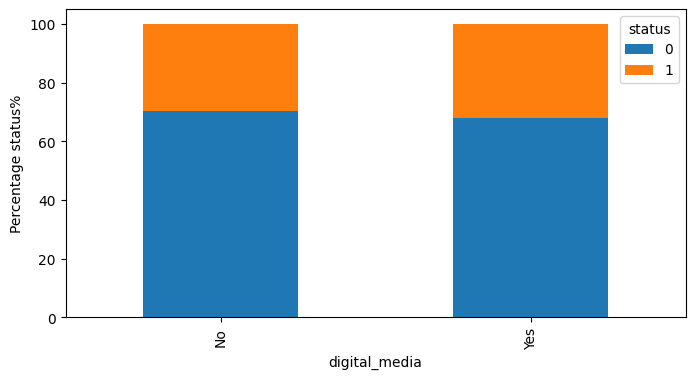

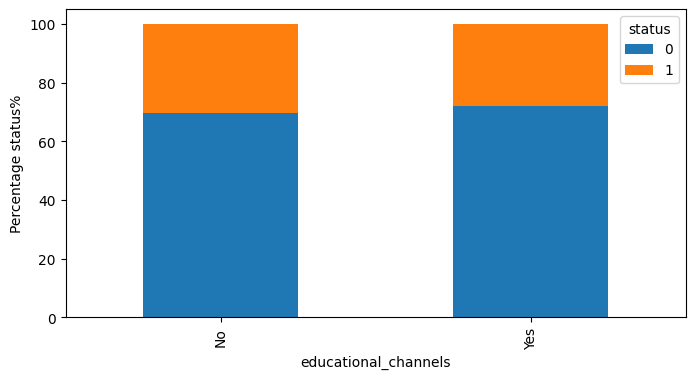

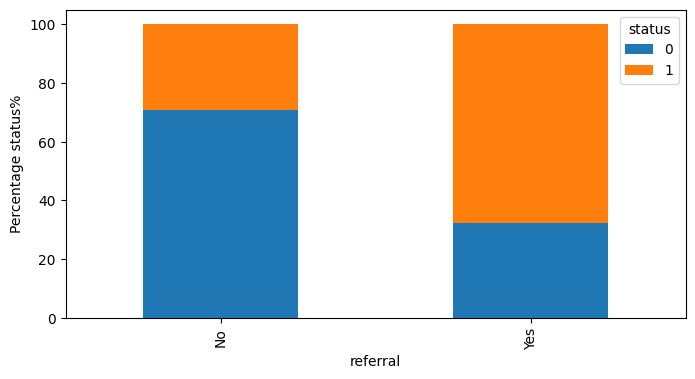

In [ ]:
for i in lead:
    if i!='status':
      if i in ['time_spent_on_website','page_views_per_visit']:
        pass
      else:
        (pd.crosstab(lead[i],lead['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage status%')


**Question 1**
Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

**Answer**
Referring to the crosstab plot above on the current occupation, more professional lead are likely to take  courses, next are the unemployed lead, and then the least are the student lead.


**Question 2** The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?



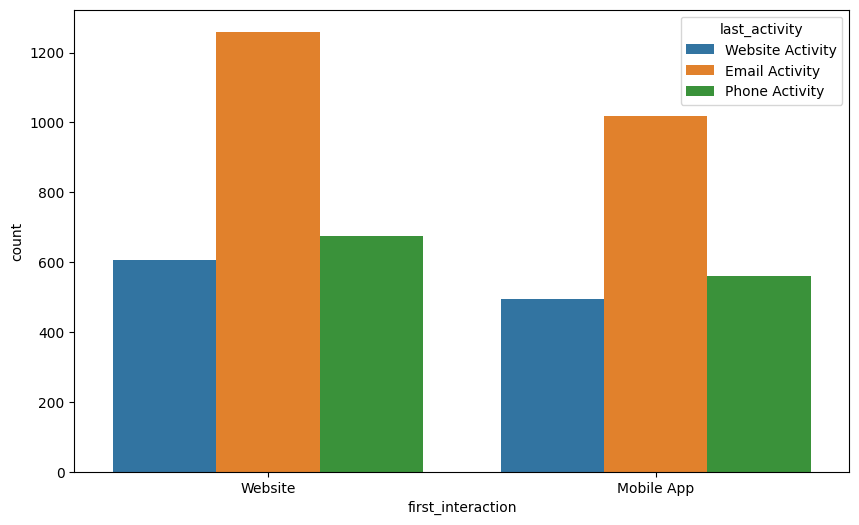

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'first_interaction', hue = 'last_activity', data = lead)
plt.show()


**Answer:**
The first impression from the company did not really have any impact on the first channel of interaction although we noticed that irrespective of where the interaction began more leads prefered the website and conversion was higher there as well than other channel.

**Question 3** The company uses multiple modes to interact with prospects. Which way of interaction works best?

**Answer**

The mode of interaction with prospect from the dataset is the website as this recorded more activity than the Phone. This is proven with a better lead conversion compared with others

**Question 4**
The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

**Answer**
The company gets better leads conversion rate from the digital media than referrals and print media.

**Question 4** People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

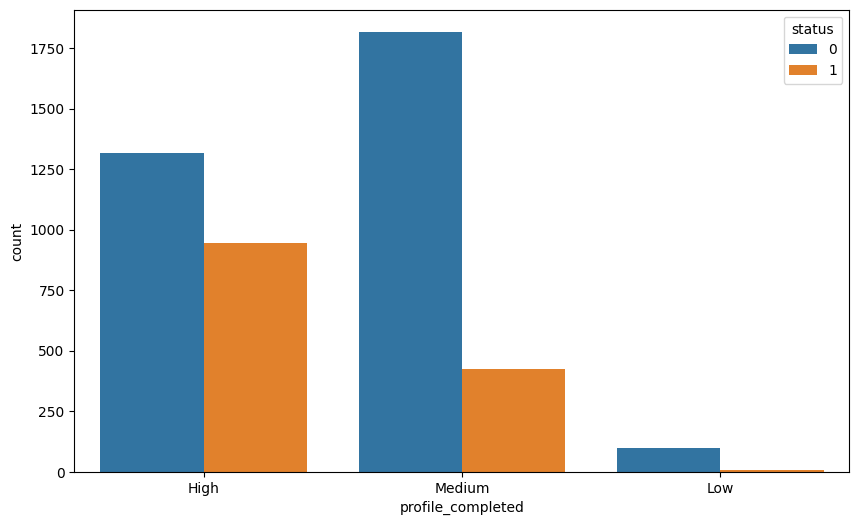

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'profile_completed', hue = 'status', data = lead)
plt.show()

**Answer**
- The data shows that more leads with high profile got converted although we do not have a strong correlation there is a possibility that having more details about a lead can improve their conversion

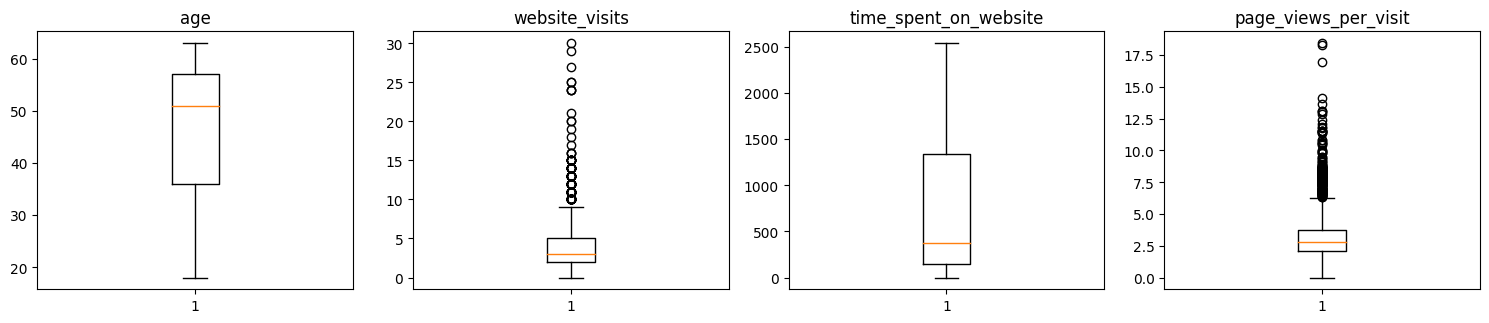

In [ ]:
# outlier detection using boxplot
numeric_columns = lead.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(lead[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

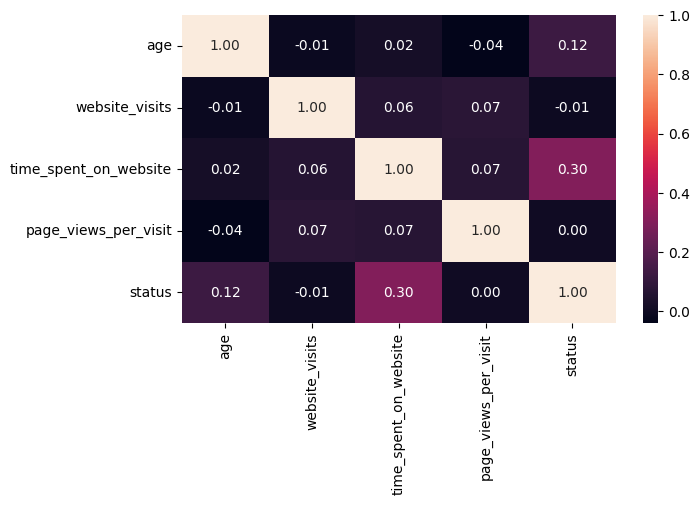

In [ ]:
plt.figure(figsize = (7, 4))
sns.heatmap(lead.corr(), annot = True, fmt = '.2f')
plt.show()

**Observations:**
- There is a correlation of .30 between the time spent on website and status. Which confirms that the website had much impact in the lead converstion than other channels.


**Data preparation for modelling**

In [ ]:
# Separating the target variable and other variables
X = lead.drop(columns = 'status')
Y = lead['status']

In [ ]:
# Creating dummy variables, drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first = True)

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

**Creating dummy variables for categorical Variables**

In [ ]:
print("Shape of the training set: ", X_train.shape)
print("Shape of the test set: ", X_test.shape)
print("Percentage of classes in the training set:")
print(y_train.value_counts(normalize = True))
print("Percentage of classes in the test set:")
print(y_test.value_counts(normalize = True))

Shape of the training set:  (3228, 16)
Shape of the test set:  (1384, 16)
Percentage of classes in the training set:
0   0.70415
1   0.29585
Name: status, dtype: float64
Percentage of classes in the test set:
0   0.69509
1   0.30491
Name: status, dtype: float64


Building Classification Models
Model evaluation criterion
Model can make wrong predictions as:
Predicting a lead will not be converted to a paid customer in reality, the lead would have converted to a paid customer.
Predicting a lead will be converted to a paid customer in reality, the lead would not have converted to a paid customer.
Which case is more important?
If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer.

If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss.

How to reduce the losses?
Company would want Recall to be maximized, greater the Recall score higher are the chances of minimizing False Negatives.
First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
The model_performance_classification_statsmodels function will be used to check the model performance of models.
The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [ ]:
# Function to print the classification report and get confusion matrix in a proper format
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [ ]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state = 7)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

#### Checking model performance on training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



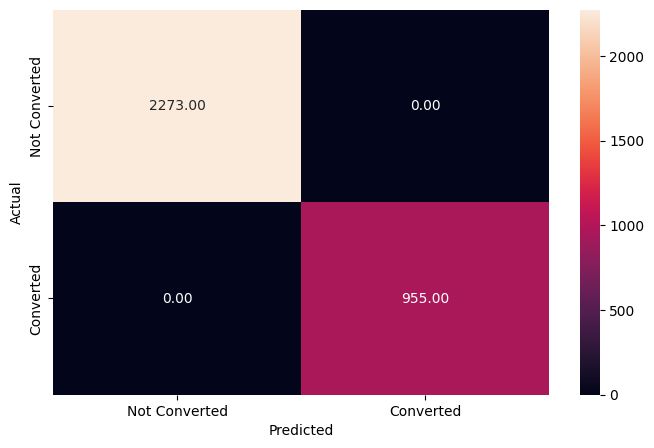

In [ ]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)
metrics_score(y_train, y_pred_train1)

**Observations**


- The training set shows no error

Translation of the Confusion Matrix
- True Positive: The lead did not convert and the lead does not convert.
- False Positive: The lead did not convert and the lead is converted.
- True Negative: The lead did convert and the lead does convert.
- False Negative: The lead will be converted and the lead did not converted.

Hence this is a fitted training dataset

**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



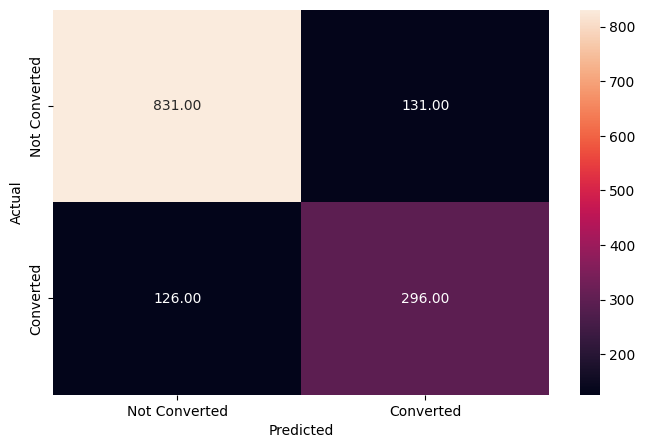

In [ ]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)
metrics_score(y_test, y_pred_test1)

**Observations**:

- Our accuracy on this test is 81% and our recall macro average is 78%

- There is overfitting as the generalization from the training dataset isn't achieved on the test deataset.

- This will require some tree prunning to handle the overfitting

## Do we need to prune the tree?

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data.

**This would tell the model that 1 is the important class here.**

In [ ]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

##### Checking model performance on train and test set

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



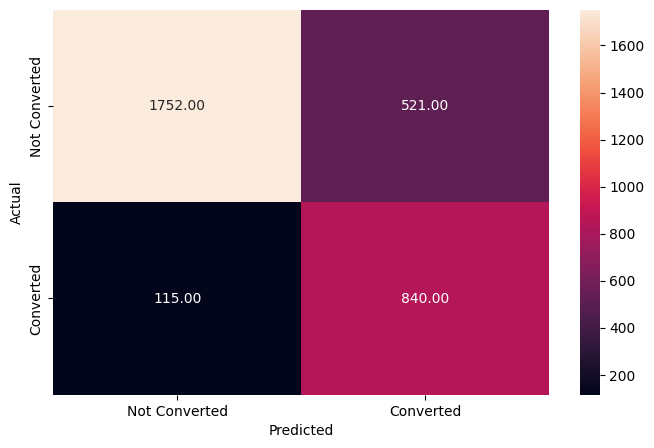

In [ ]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

**Observations:**
- We see a decreased in the training dataset performance as we are trying to reduce the overfit in the training dataset.
- We can test it again on the test dataset and compare

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



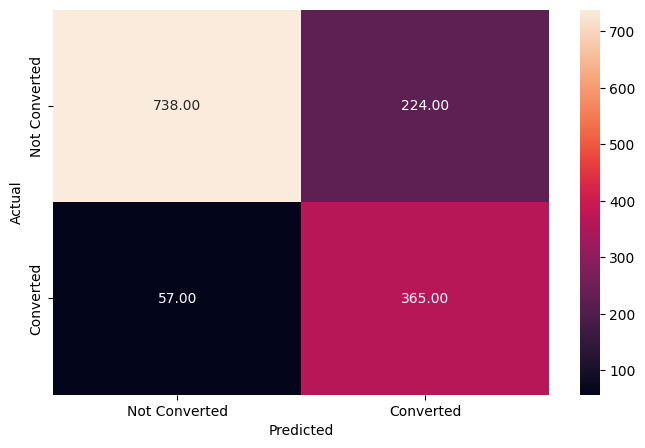

In [ ]:
# Checking performance on the testing data
y_pred_test2 =  d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)

**Observations:**

- There seem to be an improvement in the result as the overfitting has reduced which also mean it can do better generalization on the datasets

- Our accuracy on this test is 80% and our recall is 86% and macro average of 82% with a sligth increase from the previous model.

### Visualizing the Decision Tree

**Let's visualize the tuned decision tree** and observe the decision rules:

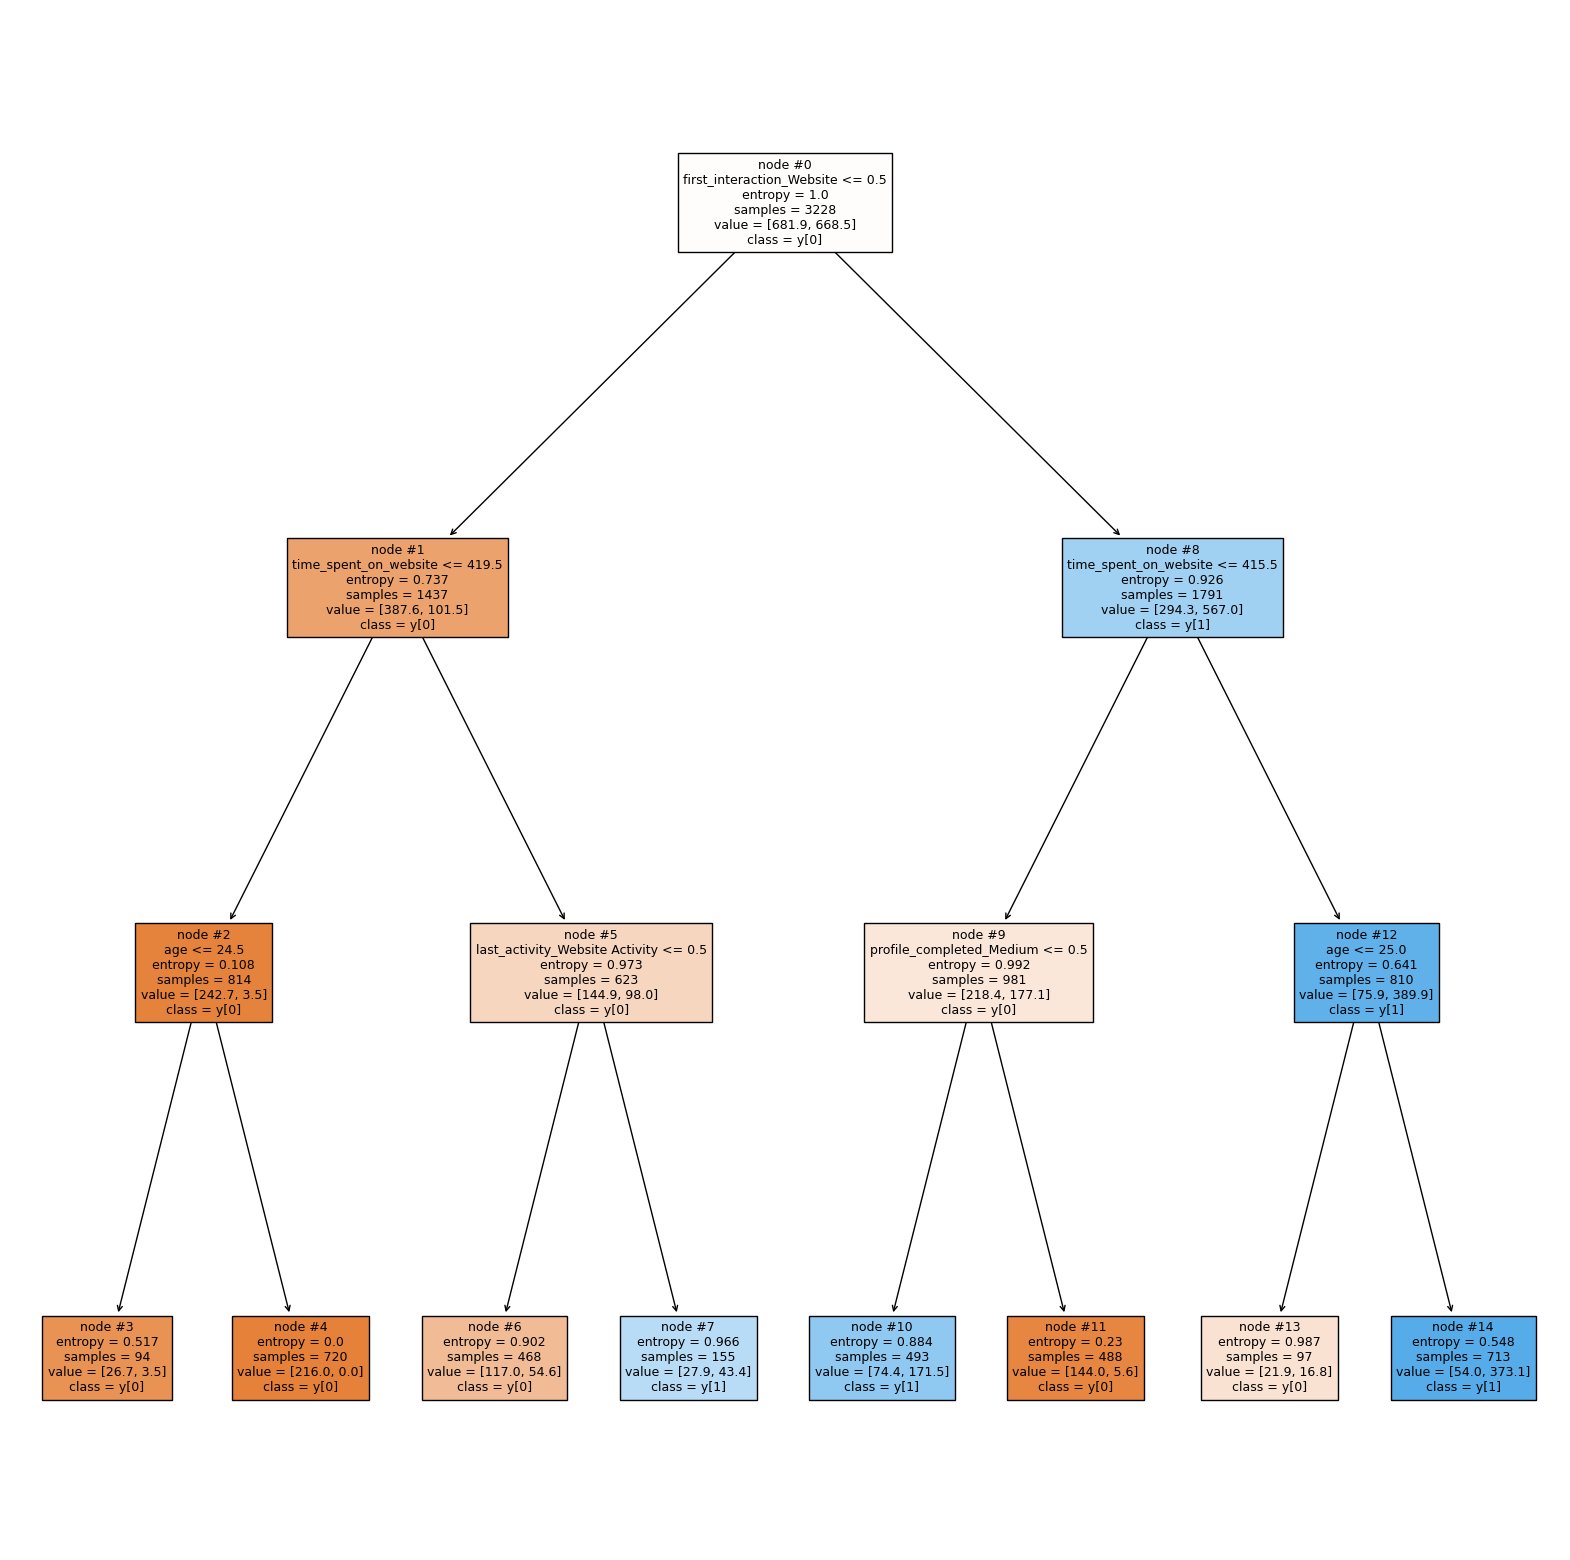

In [ ]:
features = list(X.columns)
plt.figure(figsize = (20, 20))
tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show()

**Observations:**

- The first interaction website is our root node in the decision
- This is followed by the time spent on the webiste which meaning that on the channel those who spent more time on the website play a signicant role in those leads that are enventually converted
- We have more likelyhood of those leads above the ages of 25 years getting converted.


**Let's look at the feature importance** of the tuned decision tree model

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


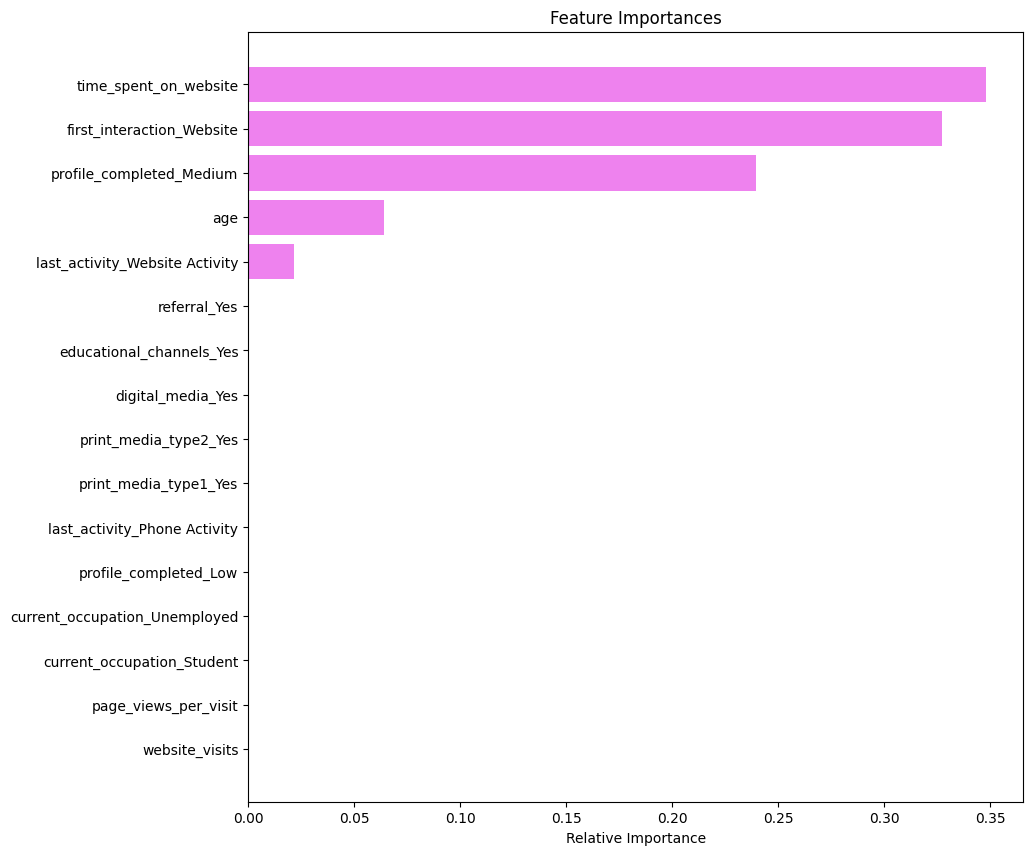

In [ ]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- The most important features are as follows and in the order of importance/ ranking

> 1. time_spent_on_website          0.34814
> 2. first_interaction_Website      0.32718
> 3. profile_completed_Medium       0.23927
> 4. age                            0.06389
> 5. last_activity_Website Activity 0.02151


In [ ]:
# Fitting the random forest tree classifier on the training data
rf_estimator =  RandomForestClassifier(random_state = 7, criterion = "entropy")
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=7)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



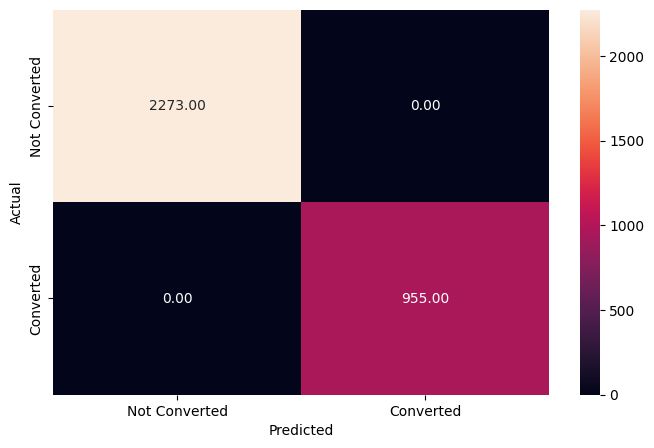

In [ ]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

Observations:

- The training set shows no error in the random forest.

Translation of the Confusion Matrix
- True Positive: The lead did not convert and the lead does not convert.
- False Positive: The lead did not convert and the lead is converted.
- True Negative: The lead did convert and the lead does convert.
- False Negative: The lead will be converted and the lead did not converted.

Hence this is a fitted training dataset

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.81      0.70      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.83      1384
weighted avg       0.86      0.86      0.86      1384



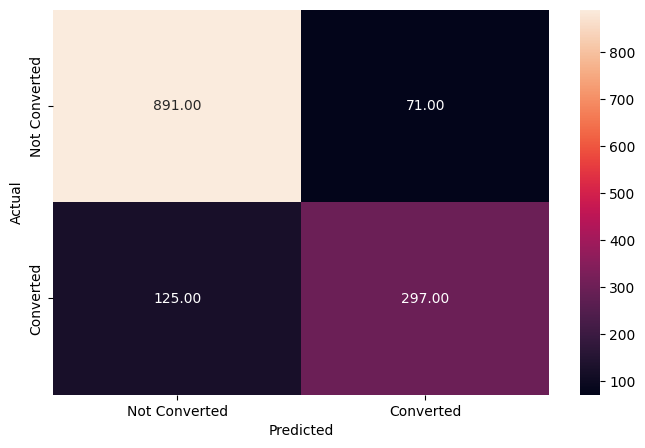

In [ ]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:**

- The random forest model on the test dataset also reduced, producing better score than the decision tree.

- Our accuracy is 86%.

- Prunning is recommended for a better model result.

**Let's see if we can get a better model by tuning the random forest classifier**

## Do we need to prune the tree?

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**.

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features=0.8,
                       n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2273
           1       0.80      0.78      0.79       955

    accuracy                           0.88      3228
   macro avg       0.86      0.85      0.85      3228
weighted avg       0.88      0.88      0.88      3228



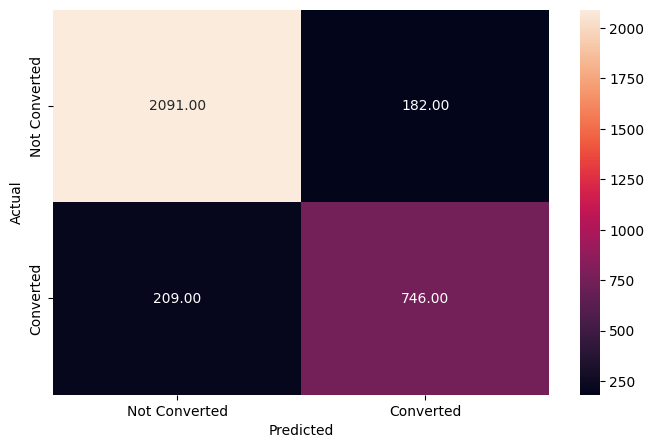

In [ ]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

Observations:

- The fine tunning did not produce a better result in contrast with the previous model on the training dataset.

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       962
           1       0.79      0.73      0.76       422

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



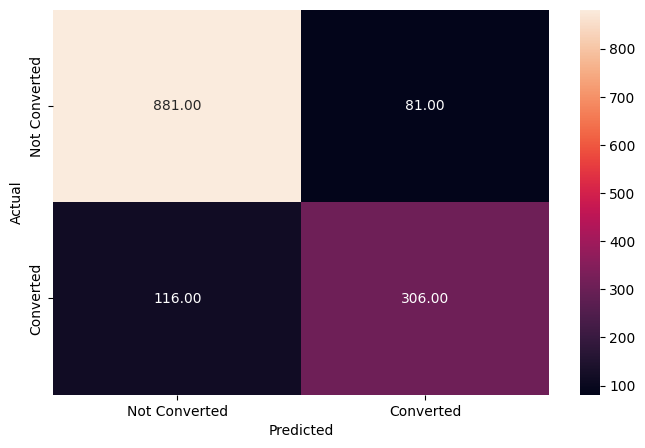

In [ ]:
# Checking performance on the training data
y_pred_test4 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test4)

**Observations:**

- Comparing the results from random forest fine tuned training dataset on the test dataset, showed lower accuracy 88% on training and 86% on test.

- Let's try another hyperparameter


In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



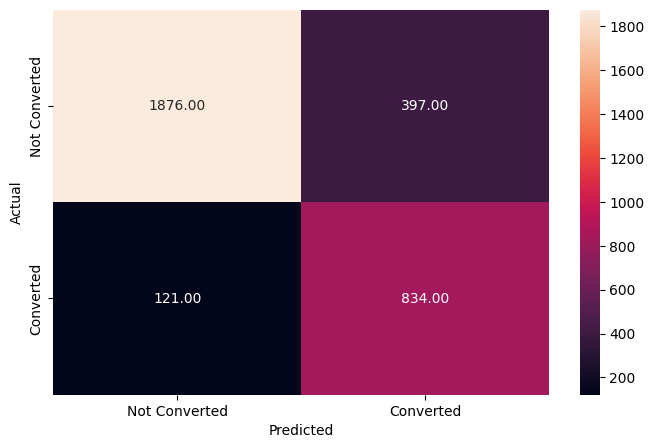

In [ ]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

**Observation**

- Recall showed sligth improvement increasing to 85%

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



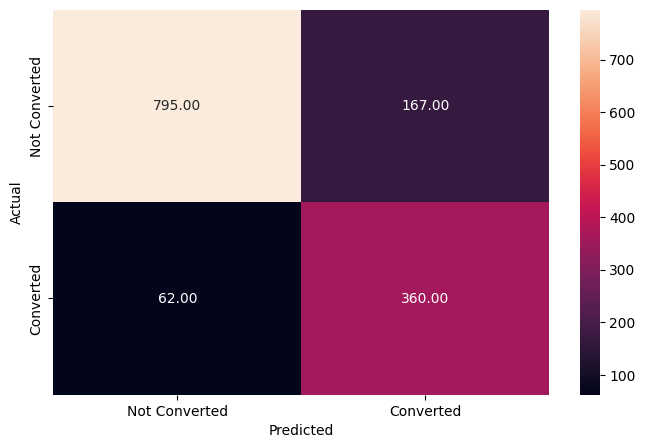

In [ ]:
# Checking performance on the test data
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Observation**
- We have an improved precision on the test dataset and a better model for predicting leads that are more likely to be converted.

In [ ]:
# Importance of features in the tree building
print (pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.30058
first_interaction_Website      0.28131
profile_completed_Medium       0.20011
age                            0.04800
last_activity_Phone Activity   0.03890
current_occupation_Unemployed  0.03712
current_occupation_Student     0.03542
last_activity_Website Activity 0.02991
page_views_per_visit           0.01549
website_visits                 0.00971
educational_channels_Yes       0.00160
profile_completed_Low          0.00142
print_media_type1_Yes          0.00036
digital_media_Yes              0.00007
print_media_type2_Yes          0.00000
referral_Yes                   0.00000


**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**

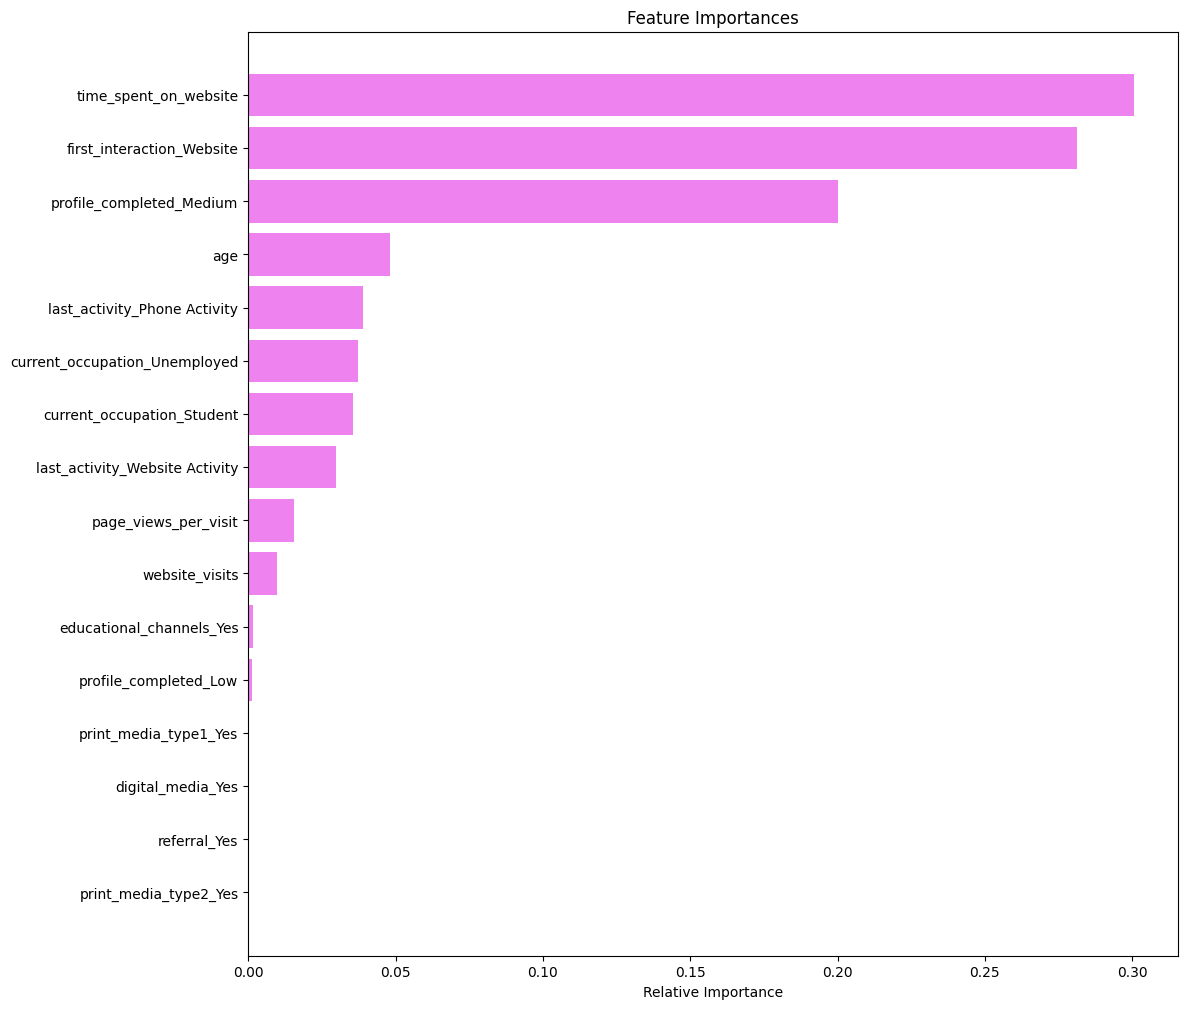

In [ ]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**

- The most important features for the random forest and are as follows in the order of importance/ranking

> 1. time_spent_on_website          0.30058
> 2. first_interaction_Website      0.28131
> 3. profile_completed_Medium       0.20011
> 4. age                            0.04800
> 5. last_activity_Phone Activity   0.03890
> 6. current_occupation_Unemployed  0.03712
> 7. current_occupation_Student     0.03542
> 8. last_activity_Website Activity 0.02991
> 9. page_views_per_visit           0.01549
> 9. website_visits                 0.00971
> 10. educational_channels_Yes       0.00160
> 11. profile_completed_Low          0.00142
> 12. print_media_type1_Yes          0.00036
> 13. digital_media_Yes              0.00007

- The number of importance were more than those from the decision tree

## Actionable Insights and Recommendations

- The Random forest gave importance to more features compared to the decision tree.  13 importance were used in the random forrest as to the decision tree which was much more lower. Random forest considers more features than decision tree.

- The random forest model is a better model in this instance to use for the prediction, because the tuned random forest has a better model for identifying the lead that are likely to be converted or not.
       - Accuracy score greater than 80% on the training data set
       - Accuracy score greater than 80% on test data set

- After tunning the random forest, it had a recall margin of 85%. This provides the confidence that better predictions can be made using the random forest over the decision tree in this instance.

- In the decision tree we had overfitting in the training data.
      - Training data recall scored greater than 80%
      - Test data recall scored greater than 80%
- we also had noticeable improvements, associated to tunning in the decision tree.

- I would recommend the random forest model.



Business Recommendations

The lead from the webiste have better potential of conversion.

The company should provide further data on where the leads were first identified, this could also provide more information as to the choices of the prefered channel for the leads, this has a potential of targeting the leads along this choices.

The company should make sure that they go after those lead who complete their profile, also have more leads complete their profile this can improve prediction and conversion dataset for the prediction.

The older leads from the umemployed and proffessional should be receive more focus because there seem to better potential in there conversion.

In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/Colab_Notebooks/Classification_and_Hypothesis_Testing/Learner_Notebook_Full_Code_Version_Potential_Customers_Prediction.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/Classification_and_Hypothesis_Testing/Learner_Notebook_Full_Code_Version_Potential_Customers_Prediction.ipynb to html
[NbConvertApp] Writing 2471118 bytes to /content/drive/MyDrive/Colab_Notebooks/Classification_and_Hypothesis_Testing/Learner_Notebook_Full_Code_Version_Potential_Customers_Prediction.html
